In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#############################Classification admis vs not admis########################################

data = pd.read_csv('datasets/classification_1.csv', header=None,names=['Exam 1', 'Exam 2', 'Admitted'])
print(data.head(2))
#print()
#print('data.describe = ')
#print(data.describe())


      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0


In [6]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
print(positive.head(2))

      Exam 1     Exam 2  Admitted
3  60.182599  86.308552         1
4  79.032736  75.344376         1


Text(0, 0.5, 'Exam 2 Score')

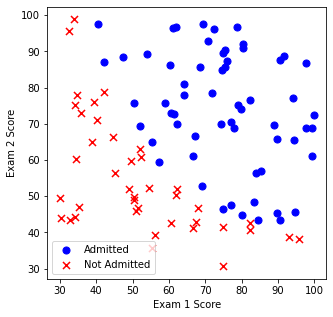

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


nums = np.arange(-10, 10, step=1)
print(nums)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


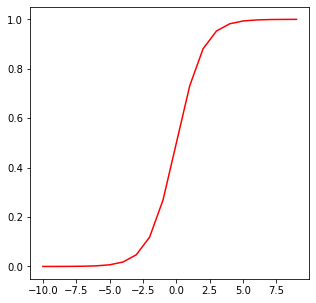

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')

In [11]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [13]:
#add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [16]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
#print()
#print('X.shape = ' , X.shape)
#print('theta.shape = ' , theta.shape)
#print('y.shape = ' , y.shape)
thiscost = cost(theta, X, y)
#print()
print('cost = ' , thiscost)

cost =  0.6931471805599453


In [33]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    
    return grad
print(gradient(theta,X,y))

[ -0.1        -12.00921659 -11.26284221]


In [18]:

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
costafteroptimize = cost(result[0], X, y)
print()
print('cost after optimize = ' , costafteroptimize)
print()


cost after optimize =  0.20349770158947425



In [55]:

def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]



theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
accurac = (sum(correct))# % len(correct))
print ('accuracy = {0}%'.format(accurac))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
accuracy = 89%


In [3]:
>>> numbers = [1, 2, 3]
>>> letters = ['a', 'b', 'c']
>>> zipped = zip(numbers, letters)
>>> zipped  # Holds an iterator object

>>> type(zipped)

>>> list(zipped)
[(1, 'a'), (2, 'b'), (3, 'c')]

[(1, 'a'), (2, 'b'), (3, 'c')]